# Playground notebook
### For prototyping and simple analysis


In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt

from src.utils import prepare_data
from src.models import BaselineMajor, BaselineRuleBased


## Reading data

In [2]:
# raw, ex. for statistics
df = pd.read_csv('./data/dialog_acts.dat', names=['sentence'])

df['target'] = df['sentence'].apply(lambda x: x.split()[0].lower())
df['sentence'] = df['sentence'].apply(lambda x: x.split(' ', 1)[1].lower())

df.head()


,sentence,target
0,im looking for a moderately priced restaurant ...,inform
1,any part of town,inform
2,bistro food,inform
3,is there a moderately priced restaurant that s...,confirm
4,yes,affirm


In [3]:
# Divided into train/test
X_train, X_test, y_train, y_test = prepare_data('./data/dialog_acts.dat', drop_duplicates=False)


In [ ]:
# TODO some data analysis

## Example model

In [4]:
model = BaselineMajor()
model.fit(X_train, y_train)
preds = model.predict(X_test)

accuracy_score(preds, y_test)


0.40041819132253004

## Error analysis

In [9]:
def plot_matrix(y_pred: pd.Series, y_test: pd.Series) -> None:
    plt.figure(figsize=(10, 8))

    class_names = np.unique(y_test)
    matrix = confusion_matrix(y_pred, y_test, normalize='true')
    sns.heatmap(matrix, annot=True, fmt=".0%", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    
    plt.xlabel('Actual')
    plt.ylabel('Predictions')
    
    plt.show()


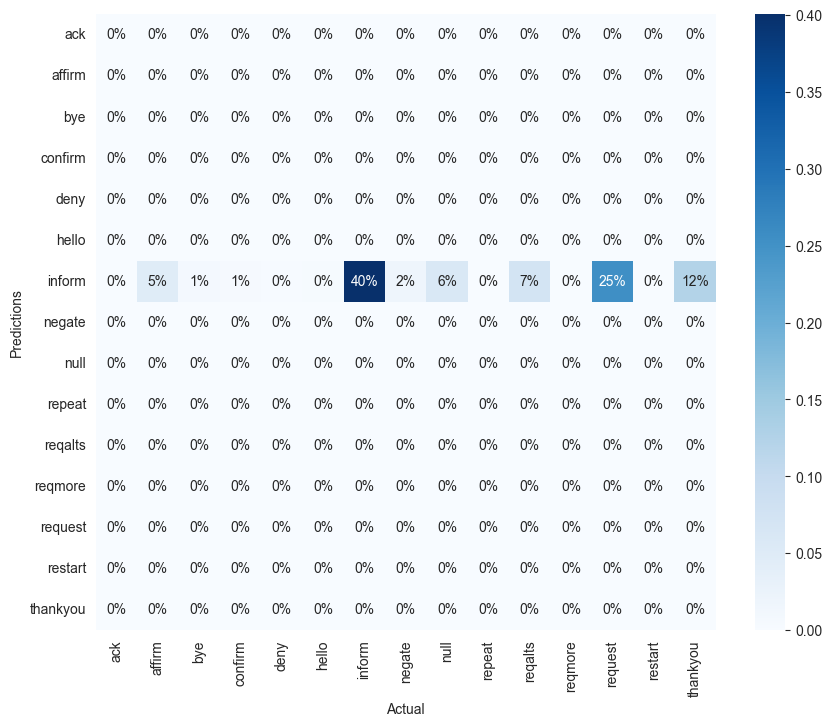

In [10]:
# sample plot
# rows are distributions of the predicted class over actual, ex. below 40% of inform were actually inform, 25% were requests and so on
# perfect model would have only 100%s on diagonal
plot_matrix(preds, y_test)


In [7]:
# some sample metrics
class_names = np.unique(y_test)
print(classification_report(y_test, preds, target_names=class_names, digits=2, zero_division=0))


              precision    recall  f1-score   support

         ack       0.00      0.00      0.00         5
      affirm       0.00      0.00      0.00       180
         bye       0.00      0.00      0.00        35
     confirm       0.00      0.00      0.00        22
        deny       0.00      0.00      0.00         6
       hello       0.00      0.00      0.00        14
      inform       0.40      1.00      0.57      1532
      negate       0.00      0.00      0.00        69
        null       0.00      0.00      0.00       232
      repeat       0.00      0.00      0.00         3
     reqalts       0.00      0.00      0.00       279
     reqmore       0.00      0.00      0.00         1
     request       0.00      0.00      0.00       972
     restart       0.00      0.00      0.00         2
    thankyou       0.00      0.00      0.00       474

    accuracy                           0.40      3826
   macro avg       0.03      0.07      0.04      3826
weighted avg       0.16   